In [ ]:
# This mounts your Google Drive to the Colab VM.
from google.colab import drive
drive.mount('/content/drive')

# TODO: Enter the foldername in your Drive where you have saved the unzipped
# assignment folder, e.g. 'cs231n/assignments/assignment1/'
FOLDERNAME = '/CNN/Final Project'
assert FOLDERNAME is not None, "[!] Enter the foldername."

# Now that we've mounted your Drive, this ensures that
# the Python interpreter of the Colab VM can load
# python files from within it.
import sys
sys.path.append('/content/drive/My Drive/{}'.format(FOLDERNAME))

Mounted at /content/drive


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv) 
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, datasets, models
from tensorflow.keras.models import Sequential
import os
import cv2
import PIL
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from tensorflow.keras.layers import Dropout, Dense, Flatten, BatchNormalization, LeakyReLU, GlobalAveragePooling2D, Conv2D, MaxPool2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tqdm import tqdm
import gc

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

import warnings
warnings.filterwarnings("ignore")

In [ ]:
images = []
labels = []
main_directory = '/content/drive/My Drive/CNN/Final Project/dataset/archive/animals/animals'

for animal in tqdm(os.listdir(main_directory)):
    print(animal)
    for i in range(len(os.listdir(main_directory + '/' + animal))):
        if i < 40:
            img = cv2.imread(main_directory + '/' + animal + '/' + os.listdir(main_directory + '/' + animal)[i])
            resized_img = cv2.resize(img,(224,224))
            resized_img = resized_img / 255.0
            images.append(resized_img)
            labels.append(animal)

images = np.array(images,dtype = 'float32')

  0%|          | 0/90 [00:00<?, ?it/s]

wombat


  1%|          | 1/90 [00:00<00:52,  1.71it/s]

rhinoceros


  2%|▏         | 2/90 [00:01<00:55,  1.58it/s]

sparrow


  3%|▎         | 3/90 [00:01<00:57,  1.52it/s]

hippopotamus


  4%|▍         | 4/90 [00:02<00:58,  1.47it/s]

cat


  6%|▌         | 5/90 [00:03<00:50,  1.69it/s]

gorilla


  7%|▋         | 6/90 [00:04<01:01,  1.37it/s]

seahorse


  8%|▊         | 7/90 [00:04<00:57,  1.44it/s]

donkey


  9%|▉         | 8/90 [00:05<00:49,  1.65it/s]

butterfly


 10%|█         | 9/90 [00:05<00:44,  1.82it/s]

raccoon


 11%|█         | 10/90 [00:06<00:45,  1.75it/s]

turtle


 12%|█▏        | 11/90 [00:06<00:48,  1.64it/s]

antelope


 13%|█▎        | 12/90 [00:07<00:43,  1.80it/s]

dragonfly


 14%|█▍        | 13/90 [00:07<00:45,  1.68it/s]

crab


 16%|█▌        | 14/90 [00:08<00:40,  1.90it/s]

pig


 17%|█▋        | 15/90 [00:08<00:40,  1.85it/s]

orangutan


 18%|█▊        | 16/90 [00:09<00:43,  1.72it/s]

dog


 19%|█▉        | 17/90 [00:10<00:45,  1.61it/s]

bee


 20%|██        | 18/90 [00:10<00:43,  1.66it/s]

fox


 21%|██        | 19/90 [00:11<00:42,  1.67it/s]

coyote


 22%|██▏       | 20/90 [00:12<00:42,  1.63it/s]

dolphin


 23%|██▎       | 21/90 [00:12<00:44,  1.55it/s]

goldfish


 24%|██▍       | 22/90 [00:13<00:40,  1.67it/s]

hare


 26%|██▌       | 23/90 [00:13<00:39,  1.69it/s]

boar


 27%|██▋       | 24/90 [00:14<00:40,  1.63it/s]

turkey


 28%|██▊       | 25/90 [00:15<00:42,  1.52it/s]

pigeon


 29%|██▉       | 26/90 [00:16<00:42,  1.49it/s]

fly


 30%|███       | 27/90 [00:16<00:39,  1.58it/s]

bear


 31%|███       | 28/90 [00:17<00:43,  1.44it/s]

penguin


 32%|███▏      | 29/90 [00:17<00:40,  1.52it/s]

squid


 33%|███▎      | 30/90 [00:18<00:37,  1.60it/s]

mosquito


 34%|███▍      | 31/90 [00:19<00:37,  1.56it/s]

panda


 36%|███▌      | 32/90 [00:19<00:35,  1.66it/s]

zebra


 37%|███▋      | 33/90 [00:20<00:38,  1.49it/s]

leopard


 38%|███▊      | 34/90 [00:21<00:35,  1.60it/s]

lobster


 39%|███▉      | 35/90 [00:21<00:35,  1.54it/s]

hamster


 40%|████      | 36/90 [00:22<00:35,  1.50it/s]

sheep


 41%|████      | 37/90 [00:23<00:35,  1.48it/s]

duck


 42%|████▏     | 38/90 [00:23<00:35,  1.48it/s]

owl


 43%|████▎     | 39/90 [00:24<00:33,  1.54it/s]

ox


 44%|████▍     | 40/90 [00:24<00:28,  1.78it/s]

reindeer


 46%|████▌     | 41/90 [00:25<00:26,  1.87it/s]

whale


 47%|████▋     | 42/90 [00:26<00:28,  1.68it/s]

moth


 48%|████▊     | 43/90 [00:26<00:30,  1.55it/s]

eagle


 49%|████▉     | 44/90 [00:27<00:28,  1.60it/s]

tiger


 50%|█████     | 45/90 [00:27<00:26,  1.70it/s]

rat


 51%|█████     | 46/90 [00:28<00:25,  1.73it/s]

crow


 52%|█████▏    | 47/90 [00:28<00:22,  1.93it/s]

grasshopper


 53%|█████▎    | 48/90 [00:29<00:21,  1.95it/s]

starfish


 54%|█████▍    | 49/90 [00:29<00:22,  1.85it/s]

otter


 56%|█████▌    | 50/90 [00:30<00:21,  1.87it/s]

hyena


 57%|█████▋    | 51/90 [00:31<00:25,  1.56it/s]

goat


 58%|█████▊    | 52/90 [00:31<00:23,  1.60it/s]

sandpiper


 59%|█████▉    | 53/90 [00:32<00:21,  1.70it/s]

seal


 60%|██████    | 54/90 [00:32<00:21,  1.70it/s]

hornbill


 61%|██████    | 55/90 [00:33<00:18,  1.87it/s]

wolf


 62%|██████▏   | 56/90 [00:34<00:20,  1.62it/s]

jellyfish


 63%|██████▎   | 57/90 [00:34<00:18,  1.77it/s]

porcupine


 64%|██████▍   | 58/90 [00:35<00:21,  1.49it/s]

hummingbird


 66%|██████▌   | 59/90 [00:36<00:18,  1.63it/s]

mouse


 67%|██████▋   | 60/90 [00:36<00:16,  1.82it/s]

lizard


 68%|██████▊   | 61/90 [00:37<00:16,  1.81it/s]

beetle


 69%|██████▉   | 62/90 [00:37<00:16,  1.74it/s]

woodpecker


 70%|███████   | 63/90 [00:38<00:14,  1.82it/s]

chimpanzee


 71%|███████   | 64/90 [00:38<00:16,  1.59it/s]

kangaroo


 72%|███████▏  | 65/90 [00:39<00:15,  1.59it/s]

parrot


 73%|███████▎  | 66/90 [00:40<00:15,  1.57it/s]

pelecaniformes


 74%|███████▍  | 67/90 [00:40<00:13,  1.74it/s]

oyster


 76%|███████▌  | 68/90 [00:41<00:14,  1.53it/s]

bat


 77%|███████▋  | 69/90 [00:42<00:14,  1.48it/s]

koala


 78%|███████▊  | 70/90 [00:42<00:11,  1.69it/s]

cockroach


 79%|███████▉  | 71/90 [00:43<00:10,  1.82it/s]

caterpillar


 80%|████████  | 72/90 [00:43<00:09,  1.88it/s]

ladybugs


 81%|████████  | 73/90 [00:44<00:09,  1.77it/s]

okapi


 82%|████████▏ | 74/90 [00:44<00:09,  1.68it/s]

swan


 83%|████████▎ | 75/90 [00:45<00:09,  1.66it/s]

hedgehog


 84%|████████▍ | 76/90 [00:46<00:08,  1.69it/s]

octopus


 86%|████████▌ | 77/90 [00:46<00:07,  1.69it/s]

horse


 87%|████████▋ | 78/90 [00:47<00:07,  1.70it/s]

deer


 88%|████████▊ | 79/90 [00:47<00:06,  1.58it/s]

bison


 89%|████████▉ | 80/90 [00:49<00:08,  1.20it/s]

squirrel


 90%|█████████ | 81/90 [00:49<00:06,  1.37it/s]

cow


 91%|█████████ | 82/90 [00:50<00:05,  1.42it/s]

goose


 92%|█████████▏| 83/90 [00:50<00:04,  1.62it/s]

lion


 93%|█████████▎| 84/90 [00:51<00:04,  1.49it/s]

flamingo


 94%|█████████▍| 85/90 [00:52<00:03,  1.52it/s]

shark


 96%|█████████▌| 86/90 [00:52<00:02,  1.55it/s]

badger


 97%|█████████▋| 87/90 [00:53<00:02,  1.44it/s]

snake


 98%|█████████▊| 88/90 [00:54<00:01,  1.22it/s]

elephant


 99%|█████████▉| 89/90 [00:55<00:00,  1.11it/s]

possum


100%|██████████| 90/90 [00:56<00:00,  1.60it/s]


In [ ]:
print(labels)

['wombat', 'wombat', 'wombat', 'wombat', 'wombat', 'wombat', 'wombat', 'wombat', 'wombat', 'wombat', 'wombat', 'wombat', 'wombat', 'wombat', 'wombat', 'wombat', 'wombat', 'wombat', 'wombat', 'wombat', 'wombat', 'wombat', 'wombat', 'wombat', 'wombat', 'wombat', 'wombat', 'wombat', 'wombat', 'wombat', 'wombat', 'wombat', 'wombat', 'wombat', 'wombat', 'wombat', 'wombat', 'wombat', 'wombat', 'wombat', 'rhinoceros', 'rhinoceros', 'rhinoceros', 'rhinoceros', 'rhinoceros', 'rhinoceros', 'rhinoceros', 'rhinoceros', 'rhinoceros', 'rhinoceros', 'rhinoceros', 'rhinoceros', 'rhinoceros', 'rhinoceros', 'rhinoceros', 'rhinoceros', 'rhinoceros', 'rhinoceros', 'rhinoceros', 'rhinoceros', 'rhinoceros', 'rhinoceros', 'rhinoceros', 'rhinoceros', 'rhinoceros', 'rhinoceros', 'rhinoceros', 'rhinoceros', 'rhinoceros', 'rhinoceros', 'rhinoceros', 'rhinoceros', 'rhinoceros', 'rhinoceros', 'rhinoceros', 'rhinoceros', 'rhinoceros', 'rhinoceros', 'rhinoceros', 'rhinoceros', 'sparrow', 'sparrow', 'sparrow', 'sparr

In [ ]:
le = preprocessing.LabelEncoder()
le.fit(labels)
class_names = le.classes_
print(class_names)
labels = le.transform(labels)
print(labels)

labels = np.array(labels, dtype = 'uint8')
labels = np.resize(labels, (len(labels),1))
print(labels.shape)

['antelope' 'badger' 'bat' 'bear' 'bee' 'beetle' 'bison' 'boar'
 'butterfly' 'cat' 'caterpillar' 'chimpanzee' 'cockroach' 'cow' 'coyote'
 'crab' 'crow' 'deer' 'dog' 'dolphin' 'donkey' 'dragonfly' 'duck' 'eagle'
 'elephant' 'flamingo' 'fly' 'fox' 'goat' 'goldfish' 'goose' 'gorilla'
 'grasshopper' 'hamster' 'hare' 'hedgehog' 'hippopotamus' 'hornbill'
 'horse' 'hummingbird' 'hyena' 'jellyfish' 'kangaroo' 'koala' 'ladybugs'
 'leopard' 'lion' 'lizard' 'lobster' 'mosquito' 'moth' 'mouse' 'octopus'
 'okapi' 'orangutan' 'otter' 'owl' 'ox' 'oyster' 'panda' 'parrot'
 'pelecaniformes' 'penguin' 'pig' 'pigeon' 'porcupine' 'possum' 'raccoon'
 'rat' 'reindeer' 'rhinoceros' 'sandpiper' 'seahorse' 'seal' 'shark'
 'sheep' 'snake' 'sparrow' 'squid' 'squirrel' 'starfish' 'swan' 'tiger'
 'turkey' 'turtle' 'whale' 'wolf' 'wombat' 'woodpecker' 'zebra']
[87 87 87 ... 66 66 66]
(3600, 1)


In [ ]:
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.33, stratify = labels)

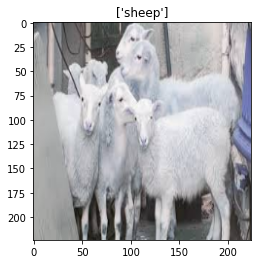

In [ ]:
n = np.random.randint(0,np.shape(train_images)[0])

plt.imshow(train_images[n])
plt.title(str(le.inverse_transform([train_labels[n]])))
plt.show()

In [ ]:
MobileNet_model = Sequential()

base_model = tf.keras.applications.mobilenet.MobileNet(include_top = False, weights = 'imagenet',input_shape = (224, 224, 3), classes = 10)
#include_top=Boolean, whether to include the fully-connected layer at the top of the network. 
#weights=One of None (random initialization), 'imagenet' (pre-training on ImageNet), or the path to the weights file to be loaded. Default to imagenet.

#print(f"Number of layers in mobilenet: {len(mobilenet_base.layers)}")

base_model.trainable = True 

for layer in base_model.layers[:10]:
    layer.trainable =  False

MobileNet_model.add(base_model)
MobileNet_model.add(GlobalAveragePooling2D())
MobileNet_model.add(Dense(units = 90, activation=('Softmax')))
MobileNet_model.summary()
                                                                                                                                                                                                                                 
early_stopping = EarlyStopping(monitor = 'val_accuracy', mode = 'max', min_delta = 1e-5, patience = 20, restore_best_weights = True, verbose = 1)

MobileNet_model.compile(optimizer = keras.optimizers.Adam(learning_rate = 0.001), loss = 'sparse_categorical_crossentropy' , metrics = ['accuracy'])
Mobile = MobileNet_model.fit(train_images, train_labels, batch_size = 64, epochs = 14, callbacks = [early_stopping], validation_data = (images, labels))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 7, 7, 1024)       3228864   
 nal)                                                            
                                                                 
 global_average_pooling2d (G  (None, 1024)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 90)                92250     
                                                                 
Total params: 3,321,114
Trainable params: 3,295,770
Non-trainable params: 25,344
_________________________________________________________________
Epoch 1/14
38/38 [==============================] - 31s 453ms/step - loss: 2.4176 - accuracy: 0.4362 - val_loss: 5.0503 - val_accuracy: 0.0925
Epoch 2/14
38/38 [============

In [ ]:
MobileNet_model

In [ ]:
MobileNet_predictions = MobileNet_model.predict(test_images)
MobileNet_predictions = np.argmax(MobileNet_predictions,axis = 1)

38/38 [==============================] - 2s 40ms/step


913


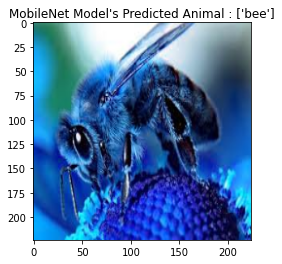

In [ ]:
randomImage = np.random.randint(0,np.shape(test_images)[0])
print(randomImage)

plt.imshow(test_images[randomImage])
plt.title("MobileNet Model's Predicted Animal : " + str(le.inverse_transform([MobileNet_predictions[randomImage]])))
plt.show()

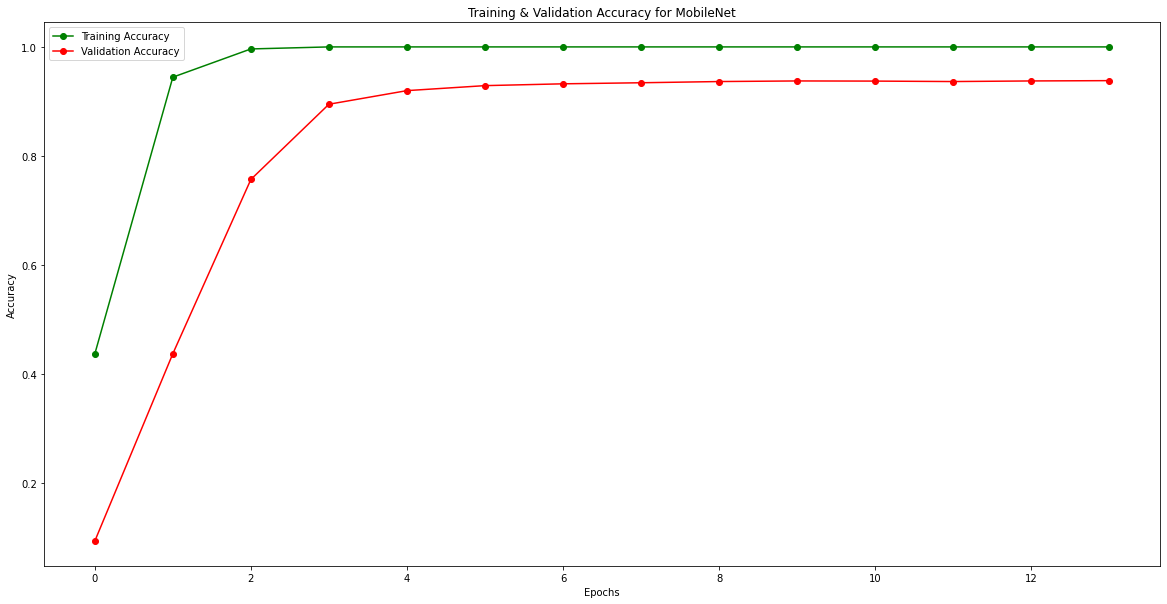

In [ ]:
plt.figure(figsize = (20,10))
x_train_acc = Mobile.history['accuracy']
x_val_acc = Mobile.history['val_accuracy']
x_epoch = [i for i in range(len(x_val_acc))]
plt.plot(x_epoch , x_train_acc , 'go-' , label = 'Training Accuracy')
plt.plot(x_epoch , x_val_acc , 'ro-' , label = 'Validation Accuracy')
plt.title('Training & Validation Accuracy for MobileNet')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.show()

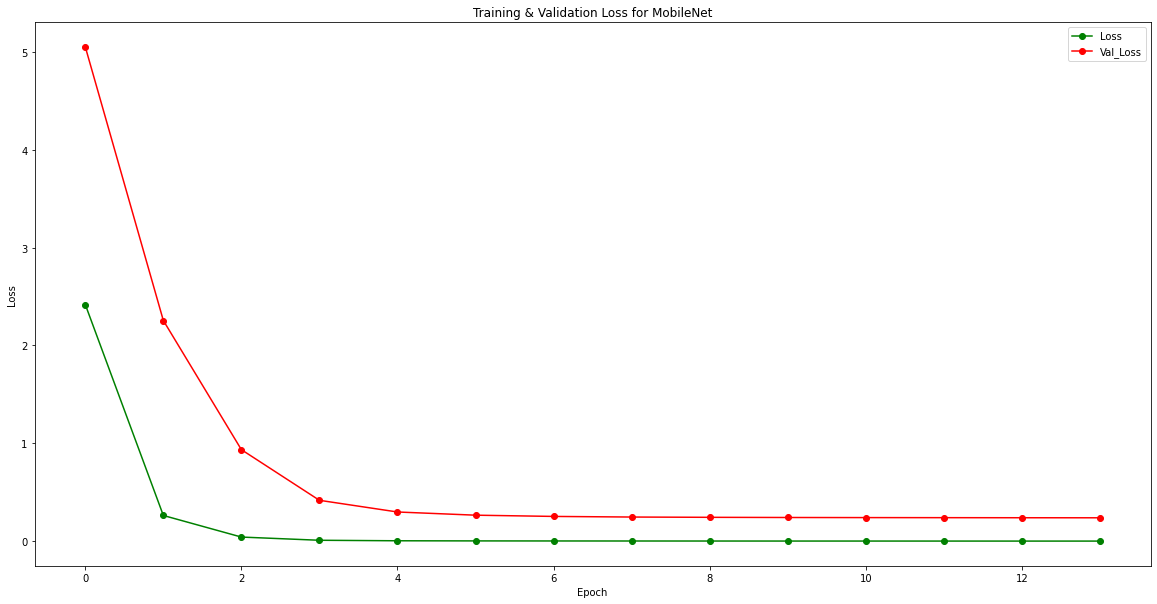

In [ ]:
plt.figure(figsize = (20,10))
x_train_acc = Mobile.history['loss']
x_val_acc = Mobile.history['val_loss']
x_epoch = [i for i in range(len(x_val_acc))]
plt.plot(x_epoch , x_train_acc , 'go-' , label = 'Loss')
plt.plot(x_epoch , x_val_acc , 'ro-' , label = 'Val_Loss')
plt.title('Training & Validation Loss for MobileNet')
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.show()